In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

Kolmogorov-Smirnov Test Statistic: 0.09680950954313547
P-value: 3.776614002638821e-198
Returns do not appear to be normally distributed.


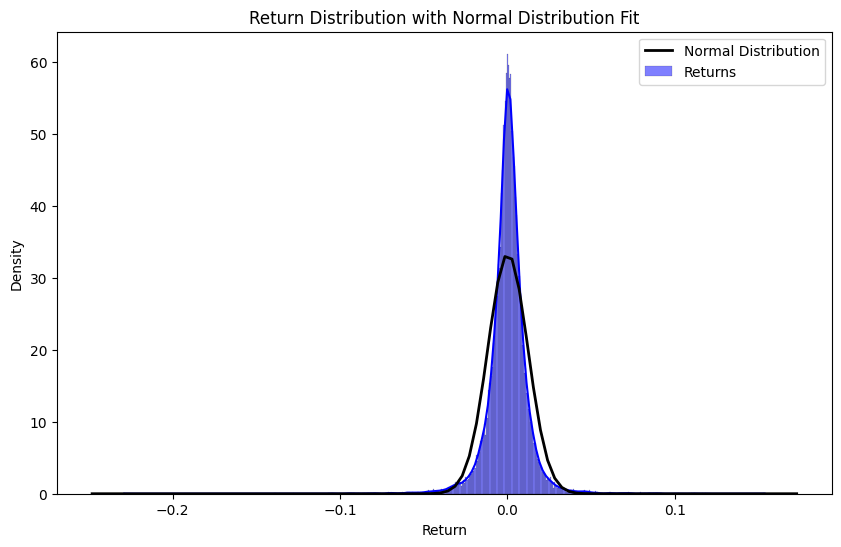

ADF Statistic: -22.437859550373272
P-value: 0.0
Critical Values: {'1%': -3.430620404125265, '5%': -2.861659510259175, '10%': -2.5668336118474144}
The returns series is stationary, indicating a random walk.


In [9]:

# อ่านไฟล์ CSV
df = pd.read_csv('S&P.csv')  # แทนที่ 'S&P.csv' ด้วย path ของไฟล์ CSV ของคุณ

# คำนวณผลตอบแทน (Return) โดยใช้การเปลี่ยนแปลงของราคาปิด (Close Price)
df['Return'] = np.log(df['Close'] / df['Close'].shift(1))

# ลบค่า NaN (ค่าแรกที่คำนวณไม่ได้)
df = df.dropna()

# สร้าง histogram ของผลตอบแทนและ KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Return'], kde=True, stat="density", color='blue', label='Returns')

# คำนวณ Normal Distribution และ plot
mu, std = np.mean(df['Return']), np.std(df['Return'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# ทดสอบว่าเป็น Normal Distribution หรือไม่ (Kolmogorov-Smirnov Test)
stat, p_value = stats.kstest(df['Return'], 'norm', args=(mu, std))
print(f"Kolmogorov-Smirnov Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("Returns appear to be normally distributed.")
else:
    print("Returns do not appear to be normally distributed.")

# แสดงกราฟ
plt.legend()
plt.title('Return Distribution with Normal Distribution Fit')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()

# ตรวจสอบการเคลื่อนที่แบบสุ่ม (Random Walk) โดยการคำนวณ Autocorrelation
from statsmodels.tsa.stattools import adfuller

# ทดสอบ Augmented Dickey-Fuller (ADF) สำหรับการทดสอบว่าข้อมูลเป็น Stationary หรือไม่
adf_stat, p_value, _, _, crit_values, _ = adfuller(df['Return'])

print(f"ADF Statistic: {adf_stat}")
print(f"P-value: {p_value}")
print(f"Critical Values: {crit_values}")

if p_value < 0.05:
    print("The returns series is stationary, indicating a random walk.")
else:
    print("The returns series is non-stationary, indicating a possible trend.")
